In [2]:
import pandas as pd

# Temizlenmiş veri setini yükleyelim
df = pd.read_csv("netflix_titles_cleaned.csv")

# İlk 5 satırı görüntüleyelim
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Eksik veri yüzdelerini hesaplayalım
missing_values = df.isnull().sum()
missing_values


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

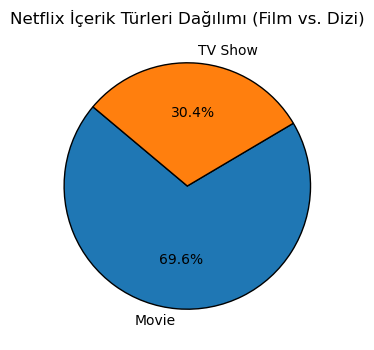

In [5]:
import matplotlib.pyplot as plt
#Netflix’te film ve dizi oranlarını bir pasta grafiği ile gösterelim
# Film ve Dizi dağılımı
type_counts = df["type"].value_counts()

# Grafik oluşturma
plt.figure(figsize=(6, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Netflix İçerik Türleri Dağılımı (Film vs. Dizi)")
plt.show()


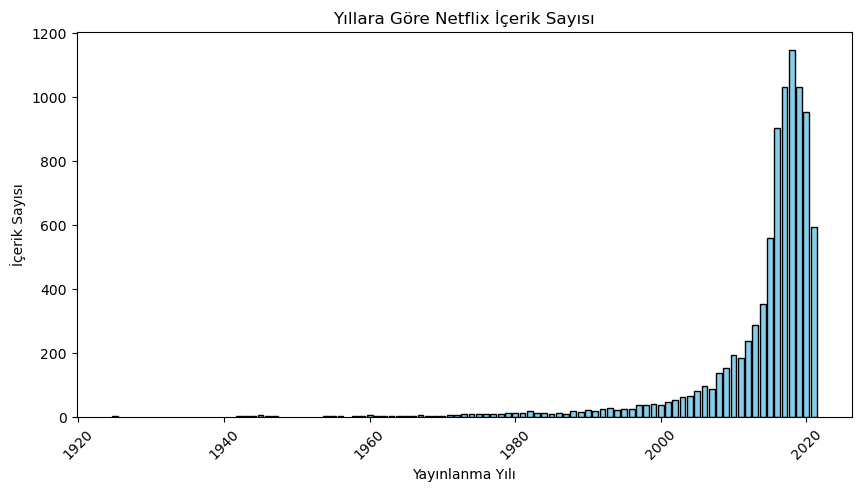

In [6]:
# Yıllara göre içerik sayısını analiz edelim
year_counts = df["release_year"].value_counts().sort_index()

# Grafik oluşturma
plt.figure(figsize=(10, 5))
plt.bar(year_counts.index, year_counts.values, color="skyblue", edgecolor="black")
plt.xlabel("Yayınlanma Yılı")
plt.ylabel("İçerik Sayısı")
plt.title("Yıllara Göre Netflix İçerik Sayısı")
plt.xticks(rotation=45)
plt.show()


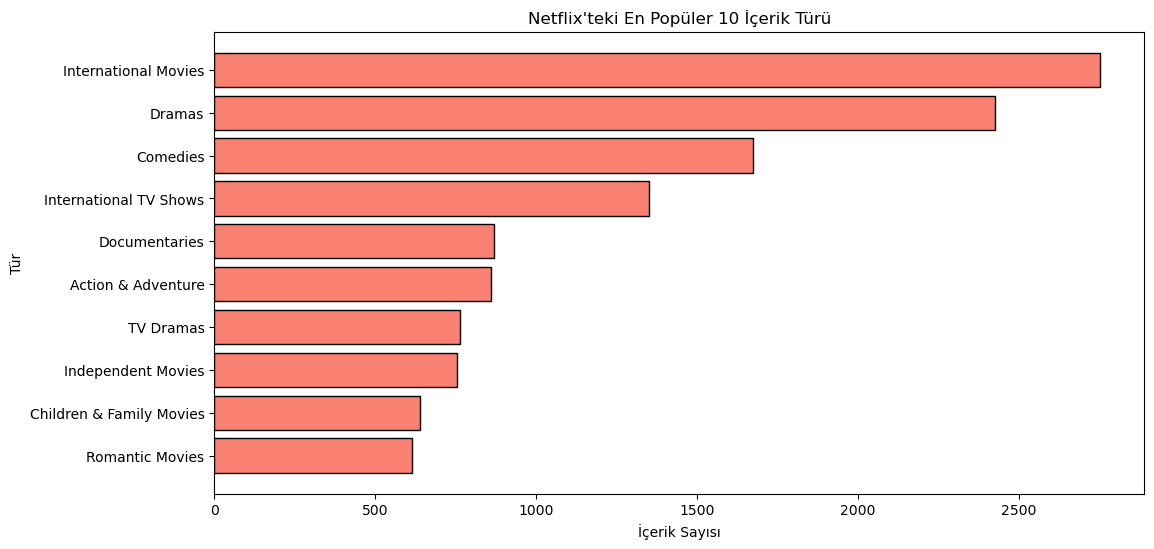

In [7]:
from collections import Counter

# Türleri listeleyip sayalım
all_genres = [genre.strip() for genres in df["listed_in"] for genre in genres.split(",")]
genre_counts = Counter(all_genres).most_common(10)  # En popüler 10 tür

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.barh([genre[0] for genre in genre_counts], [genre[1] for genre in genre_counts], color="salmon", edgecolor="black")
plt.xlabel("İçerik Sayısı")
plt.ylabel("Tür")
plt.title("Netflix'teki En Popüler 10 İçerik Türü")
plt.gca().invert_yaxis()  # En büyük değeri en üstte göstermek için
plt.show()


In [8]:
df.to_csv("netflix_analysis_output.csv", index=False)
